Students


In [ ]:
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load data file
import pandas as pd
csv_avgtimes = '/content/drive/Shareddrives/Practical Statistical Hypothesis Testing 2023/Data Processing Gr1/TEACHERS.csv'
dataset_teachers = pd.read_csv(csv_avgtimes)

csv_avgtimes2 = '/content/drive/Shareddrives/Practical Statistical Hypothesis Testing 2023/Data Processing Gr1/STUDENTS.csv'
dataset_students = pd.read_csv(csv_avgtimes2)

dataset_teachers.head()

dataset_students.head()

dataset_teachers.replace("computing science", "computer sci")

,field,gender,age,sign,correct,incorrect,initial confidence,experience
0,computer sci,Male,35-44,&,3,2,5,I use it regularly.
1,artificial Intelligence,Male,55-64,#,3,2,5,I use it regularly.
2,artificial Intelligence,Male,55-64,&,2,3,4,I use it regularly.
3,artificial Intelligence,Male,25-34,%,5,0,5,I use it regularly.
4,computer sci,Male,45-54,%,4,1,5,I use it regularly.
5,computer sci,Male,35-44,#,2,3,5,"I have heard about it, but have never used it."
6,mathematics,Male,>65,@,3,2,5,"I have heard about it, but have never used it."
7,computer sci,Male,>65,$,1,4,3,I have used it once or twice.
8,others,Male,25-34,&,1,4,5,I have used it once or twice.
9,mathematics,Male,35-44,&,3,2,4,"I have heard about it, but have never used it."


In [ ]:
print(dataset_teachers['field'].value_counts())
print(dataset_students['field'].value_counts())

mathematics                15
artificial Intelligence    10
computing science           8
others                      4
Name: field, dtype: int64
physics        16
bme             7
mathematics     6
lst             4
others          4
Name: field, dtype: int64


In [ ]:
frames = [dataset_teachers, dataset_students]

full_dataset = pd.concat(frames)

print(full_dataset['field'].value_counts())

mathematics                21
physics                    16
artificial Intelligence    10
computing science           8
others                      8
bme                         7
lst                         4
Name: field, dtype: int64


In [ ]:
print(full_dataset['initial confidence'].value_counts())

study_mean = full_dataset.groupby('initial confidence').mean()
study_mean = study_mean.reset_index(drop=False)

study_mean

5    22
2    21
3    17
4     9
1     5
Name: initial confidence, dtype: int64


<ipython-input-7-1c1d169ed993>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  study_mean = full_dataset.groupby('initial confidence').mean()


,initial confidence,correct,incorrect
0,1,2.000000,3.000000
1,2,2.952381,2.047619
2,3,2.470588,2.529412
3,4,2.333333,2.666667
4,5,2.636364,2.363636


<ipython-input-8-9c752489b27b>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  full_dataset = full_dataset.groupby('field').mean()


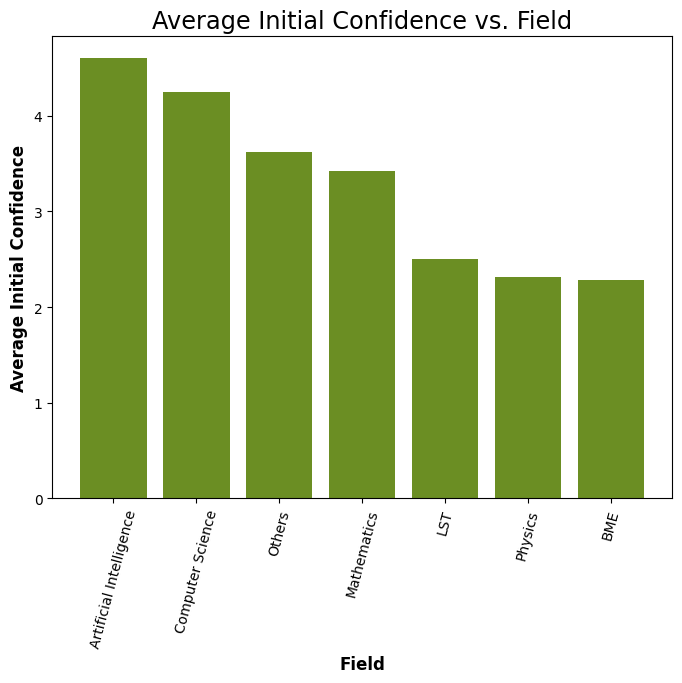

In [ ]:
fig = plt.figure(figsize=(8,6))

full_dataset = full_dataset.groupby('field').mean()
full_dataset = full_dataset.reset_index(drop=False)
full_dataset = full_dataset.sort_values('initial confidence', ascending=False)
full_dataset['field'] = full_dataset['field'].str.capitalize()

plt.bar(full_dataset['field'], full_dataset['initial confidence'], color="olivedrab")
plt.title('Average Initial Confidence vs. Field', fontsize="xx-large")
plt.ylabel('Average Initial Confidence', fontsize="large", fontweight="bold")
plt.xlabel('Field', fontsize="large", fontweight="bold")
plt.xticks(rotation=75)

plt.show()

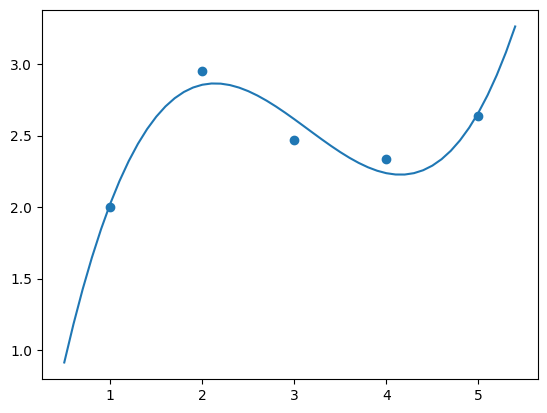

In [ ]:
import matplotlib.pyplot as plot
from scipy.optimize import curve_fit

def poly(x,a,b,c,d):
    return a*x**3+b*x**2+c*x+d

(a,b,c,d),popcov = curve_fit(poly,study_mean['initial confidence'],study_mean['correct'])

plt.scatter(study_mean['initial confidence'], study_mean['correct'])
x_model = np.arange(0.5,5.5,0.1)
plt.plot(x_model,poly(x_model,a,b,c,d))

<ipython-input-10-87ca28796aad>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  full_dataset.groupby(iv).mean()


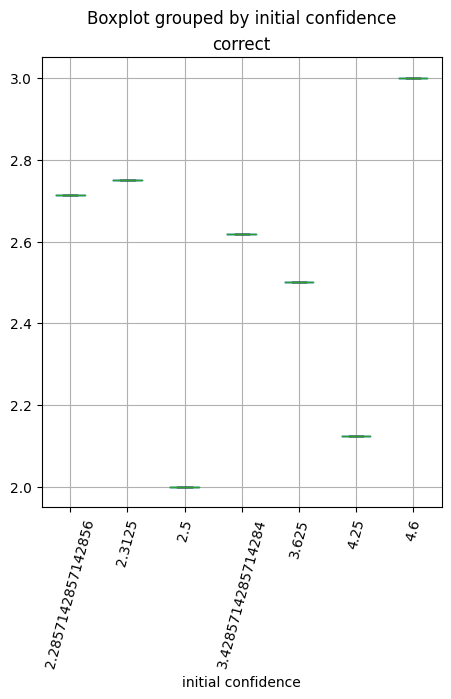

In [ ]:
dv = 'correct'
iv = 'initial confidence'

full_dataset.groupby(iv).mean()

full_dataset.boxplot(column = dv, by = iv, figsize = (5, 6), grid = True)

plt.xticks(rotation=75)
plt.show()


In [ ]:
full_dataset.head()

,field,correct,incorrect,initial confidence
0,Artificial intelligence,3.000000,2.000000,4.600000
2,Computing science,2.125000,2.875000,4.250000
5,Others,2.500000,2.500000,3.625000
4,Mathematics,2.619048,2.380952,3.428571
3,Lst,2.000000,3.000000,2.500000


### until here the analysis

# D’Agostino’s K^2 Test
Tests whether a data sample has a Gaussian distribution.

Assumptions

Observations in each sample are independent and identically distributed (iid).

Interpretation

- H0: the sample has a Gaussian distribution.
- H1: the sample does not have a Gaussian distribution.

In [ ]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest

data = full_dataset['initial confidence']
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

ValueError: ignored

##ANOVA model 1

In [ ]:
# install pingouin as !pip install pingouin. this will be used later for statistical analysis
# !pip install pingouin
import pingouin as pg
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
# mpl.rcParams['figure.dpi'] = 300
# plt.style.use('seaborn-whitegrid')

In [ ]:
dv = 'correct'
iv = 'initial confidence'

full_dataset.groupby(iv).mean()

In [ ]:
ax = full_dataset.boxplot(column = dv, by = iv, figsize = (5, 6), grid = True, color="green")

ax.set_xlabel("Initial Confidence", fontweight="bold", fontsize="medium")
ax.set_ylabel("Number of correct answers", fontweight="bold", fontsize="medium")
ax.set_title("Scores vs. Initial Confidence", fontweight="bold", fontsize="x-large")

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.grid(False)
ax.set_frame_on(False)

sns.kdeplot(data = full_dataset, x = dv, hue = iv,
            fill = False, ax = ax)
plt.show()

pg.normality(full_dataset, dv = dv, group = iv, method = 'shapiro')

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (12, 10))
axes[1,1].set_axis_off()

categories = full_dataset[iv].unique()
for ax, cat in zip(axes.flatten(), categories):
    mask = full_dataset[iv] == cat
    sample = full_dataset.loc[mask, dv]
    pg.qqplot(sample, ax = ax)
    ax.set_title(f"Q-Q Plot for category {cat}")
    ax.grid(False)

In [ ]:
pg.homoscedasticity(full_dataset, dv = dv, group = iv, method = 'levene')

In [ ]:
df_anova = pg.anova(full_dataset, dv = dv, between = iv)
df_anova

In [ ]:
df_anova = pg.welch_anova(full_dataset, dv = dv, between = iv)
df_anova

In [ ]:
pg.pairwise_gameshowell(full_dataset, dv = dv, between = iv)

## ANOVA model 2

In [ ]:
# two variables of interest
sample_dataset_1 = full_dataset[['initial confidence', 'correct']]
groups = sample_dataset_1.groupby('initial confidence').count().reset_index()
# groups.plot(kind='bar',x='major',y='salary')
groups

In [ ]:
import scipy.stats as stats
unique_majors = sample_dataset_1['initial confidence'].unique()

for major in unique_majors:
    stats.probplot(sample_dataset_1[sample_dataset_1['initial confidence'] == major]['correct'], dist="norm", plot=plt)
    plt.title(f"Probability Plot - {major}")
    plt.show()

In [ ]:
# calculate ratio of the largest to the smallest sample standard deviation
ratio = sample_dataset_1.groupby('field').std().max() / sample_dataset_1.groupby('field').std().min()
ratio

In [ ]:
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = sample_dataset_1['correct'].mean()
SSTR = sample_dataset_1.groupby('field').count() * (sample_dataset_1.groupby('field').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['correct'].sum()

# calculate SSE and update anova table
SSE = (sample_dataset_1.groupby('field').count() - 1) * sample_dataset_1.groupby('field').std()**2
anova_table['SS']['Within Groups'] = SSE['correct'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['correct'].sum() + SSE['correct'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = sample_dataset_1['field'].nunique() - 1
anova_table['df']['Within Groups'] = sample_dataset_1.shape[0] - sample_dataset_1['field'].nunique()
anova_table['df']['Total'] = sample_dataset_1.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.1
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table

In [ ]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
print(conclusion)